In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [9]:
def heading(title):
    print(f"{'=' * len(title)}")
    print(f"{title.upper()}")
    print(f"{'=' * len(title)}")

In [10]:
# loading the data from csv file to a Pandas DataFrame
df = pd.read_csv('Mall_Customers.csv')

In [11]:
# first 5 rows
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
heading('Rows and Columns')
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")

ROWS AND COLUMNS
Rows: 200
Columns: 5


In [13]:
# data incpsection
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [14]:
heading('Columns Types')
total_columns = df.columns.tolist()
number_of_columns = len(total_columns)
print("Number of Total Columns are : \n", number_of_columns)
print("Total Columns are : \n", total_columns)

# numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64'])
number_of_numerical_columns = len(numerical_columns.columns)
print("Number of Numerical Columns are : \n", number_of_numerical_columns)
print("Numerical Columns are : \n", numerical_columns.columns)

# categorical columns
categorical_columns = df.select_dtypes(include=['object'])
number_of_categorical_columns = len(categorical_columns.columns)
print("Number of Categorical Columns are : \n", number_of_categorical_columns)
print("Categorical Columns are : \n", categorical_columns.columns)

COLUMNS TYPES
Number of Total Columns are : 
 5
Total Columns are : 
 ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
Number of Numerical Columns are : 
 4
Numerical Columns are : 
 Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')
Number of Categorical Columns are : 
 1
Categorical Columns are : 
 Index(['Gender'], dtype='object')


<Figure size 1000x600 with 0 Axes>

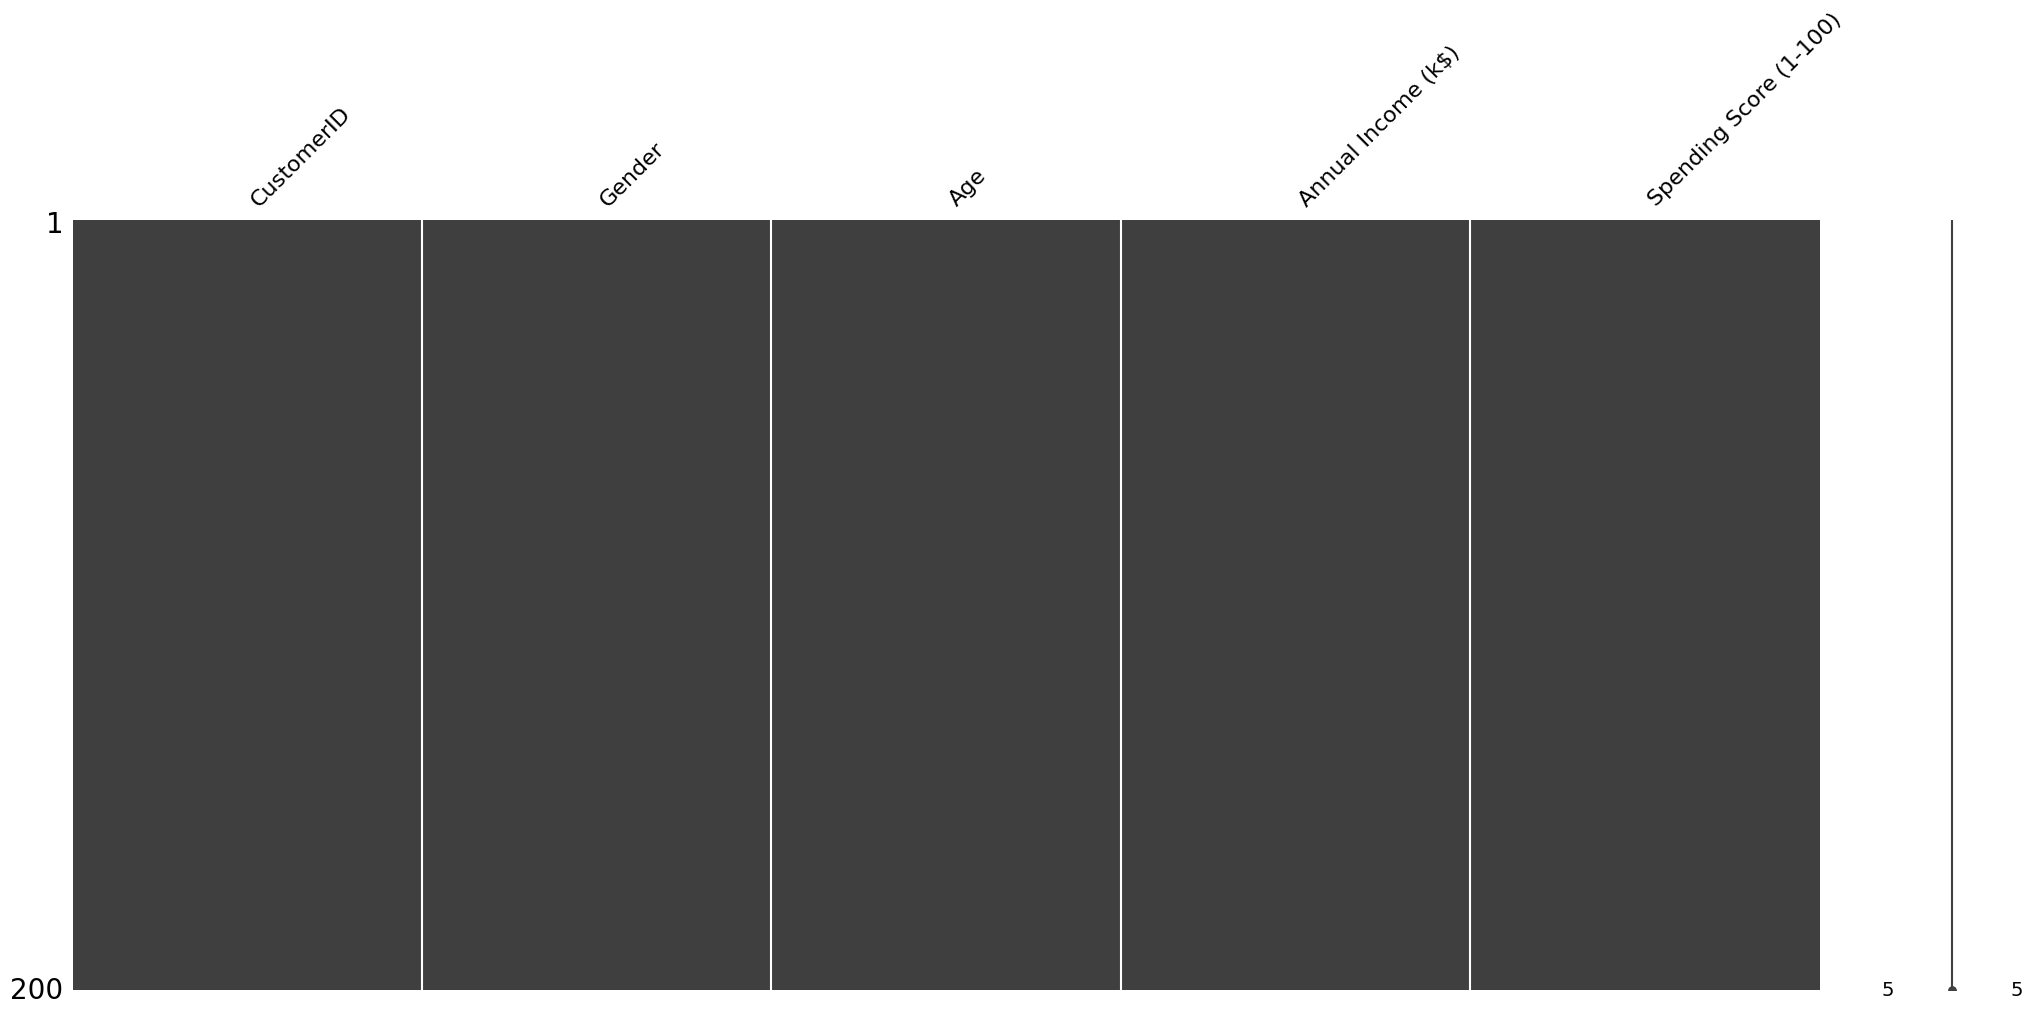

In [15]:
# checking for missing values
import missingno as msno

# Visualize missing data as a matrix plot
plt.figure(figsize=(10, 6))
msno.matrix(df)
plt.show()

In [16]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

df: your DataFrame (likely containing customer data like ID, Age, Gender, Income, etc.)

iloc: index-based selection (selects by row/column position, not name)

[:, [3, 4]]:

: → all rows

[3, 4] → columns at position 3 and 4 (i.e., 4th and 5th columns)

In [18]:
# choosing the Annual Income and Spending Score columns for clustering
X = df.iloc[:, [3, 4]].values
# Why do we use .values
# Because most machine learning models in scikit-learn (like KMeans, StandardScaler, etc.) 
# expect data in the form of a NumPy array, not a DataFrame.

## Choosing the number of clusters with
## WCSS -> Within Clusters Sum of Squares

In [ ]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11): # 1-10
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

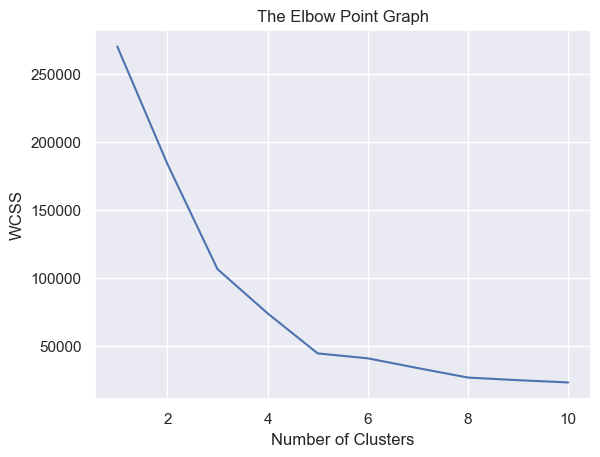

In [21]:
# plot an elbow graph

# sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


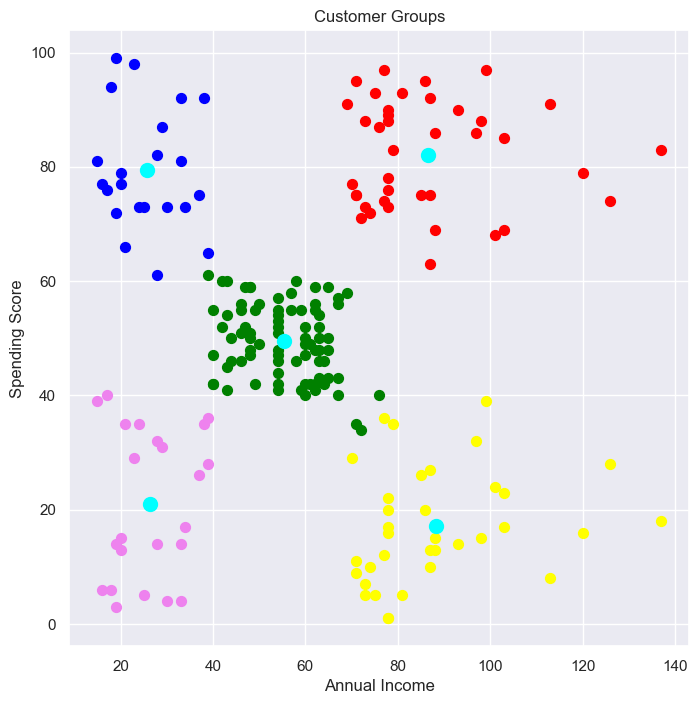

In [23]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()